In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

def load(path: str) -> pd.DataFrame:
    """Load a CSV file into a Dataset object.

    Args:
        path (str): path to the CSV file

    Returns:
        Dataset: object containing the data
    """
    try:
        if not path.lower().endswith(("csv")):
            raise AssertionError("Only csv formats are supported.")
        local_dir = os.path.abspath('')
        file_path = os.path.join(local_dir, path)
        if not os.path.exists(file_path) or os.path.isdir(file_path):
            raise AssertionError("File not found:", file_path)
        df = pd.read_csv(file_path)
        return df
    except AssertionError as error:
        print(f"{AssertionError.__name__}: {error}")
        return None

In [2]:
train_knight = load("../Train_knight.csv")
test_knight = load("../Test_knight.csv")


In [3]:
def get_predictions(train_knight: pd.DataFrame, test_knight: pd.DataFrame) -> list:
    x = train_knight.drop('knight', axis=1)
    y = train_knight['knight']
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print(f"F1_score : {f1_score(y_test, y_pred, average='macro')}")
    
    with open("Tree.txt", "w") as output:
          for item in y_pred:
            output.write(item + "\n")
  
    plt.figure(figsize=(10, 7))
    plot_tree(clf, filled=True, rounded=True, class_names=['Jedi', 'Sith'])
    plt.show()
    
    return y_pred

F1_score : 0.9572619132416839


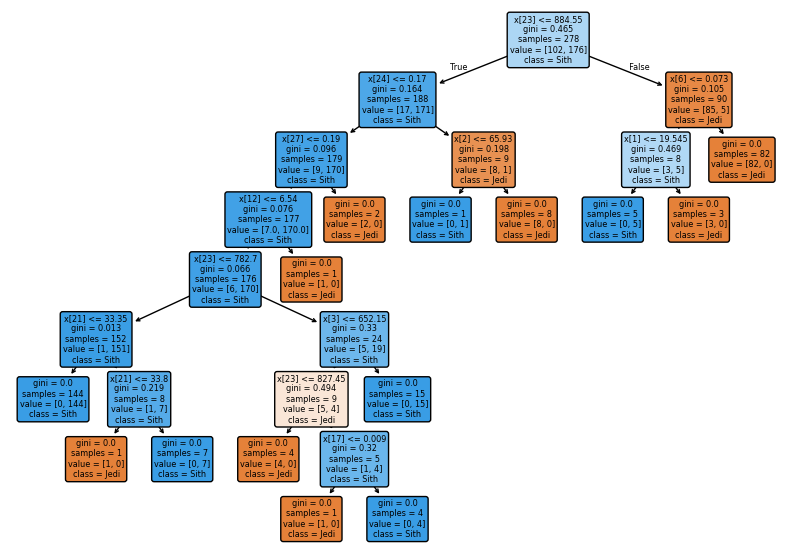

['Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Jedi' 'Jedi'
 'Sith' 'Jedi' 'Jedi' 'Sith' 'Sith' 'Sith' 'Jedi' 'Sith' 'Jedi' 'Sith'
 'Jedi' 'Sith' 'Jedi' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith'
 'Sith' 'Sith' 'Jedi' 'Jedi' 'Jedi' 'Sith' 'Sith' 'Jedi' 'Jedi' 'Jedi'
 'Jedi' 'Jedi' 'Jedi' 'Jedi' 'Sith' 'Jedi' 'Sith' 'Sith' 'Jedi' 'Jedi'
 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Jedi' 'Sith' 'Sith' 'Jedi' 'Jedi'
 'Jedi' 'Sith' 'Jedi' 'Jedi' 'Sith' 'Sith' 'Jedi' 'Sith' 'Sith' 'Jedi'
 'Jedi' 'Sith' 'Jedi' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Jedi' 'Jedi'
 'Jedi' 'Sith' 'Sith' 'Sith' 'Jedi' 'Sith' 'Sith' 'Sith' 'Jedi' 'Sith'
 'Sith' 'Jedi' 'Jedi' 'Jedi' 'Jedi' 'Sith' 'Jedi' 'Jedi' 'Jedi' 'Jedi'
 'Sith' 'Sith' 'Sith' 'Jedi' 'Jedi' 'Jedi' 'Jedi' 'Sith' 'Sith' 'Sith'
 'Sith' 'Jedi' 'Jedi' 'Sith' 'Sith' 'Sith' 'Jedi' 'Sith' 'Sith' 'Sith']


In [4]:
print(get_predictions(train_knight, train_knight))